In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import keras
import random
import collections
import numpy as np
import matplotlib.pyplot as plt


def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index
        is np arrays (images) and second is labels
        and display n random images with labels
        from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()


# Dataset

There are 60000 images in training dataset
There are 10000 images in training dataset
___________________


Randomly printing 10 images with labels from training dataset
index: 17923
Lable: 0


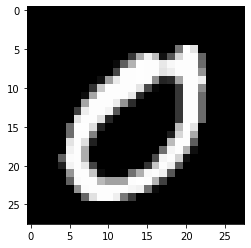

index: 10925
Lable: 6


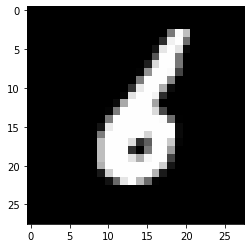

index: 34050
Lable: 5


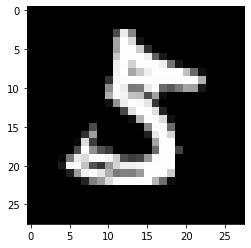

index: 32298
Lable: 0


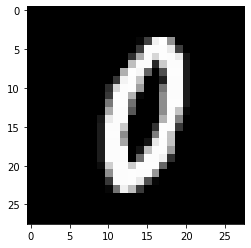

index: 21492
Lable: 1


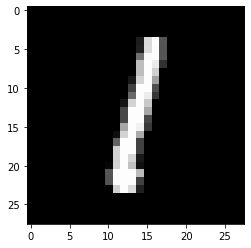

index: 11448
Lable: 6


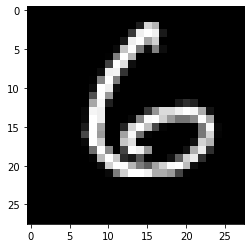

index: 55125
Lable: 9


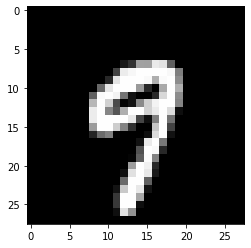

index: 9804
Lable: 1


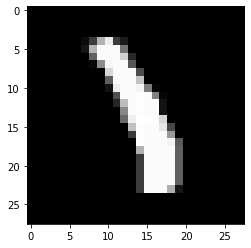

index: 45387
Lable: 2


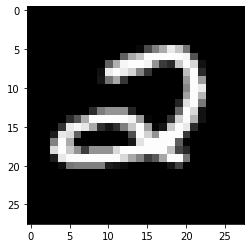

index: 25675
Lable: 5


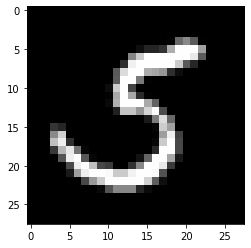

___________________


Randomly printing 10 images with labels from testing dataset
index: 32237
Lable: 0


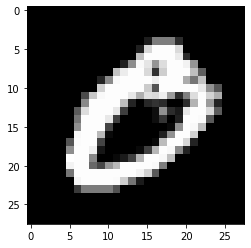

index: 10645
Lable: 0


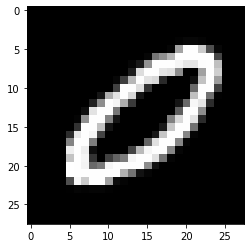

index: 43948
Lable: 1


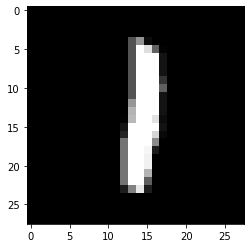

index: 19015
Lable: 3


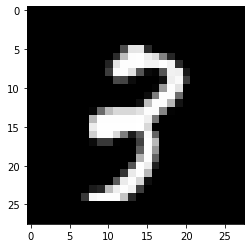

index: 35315
Lable: 2


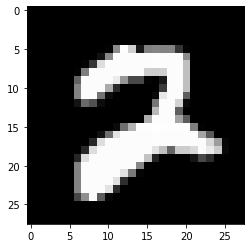

index: 12697
Lable: 5


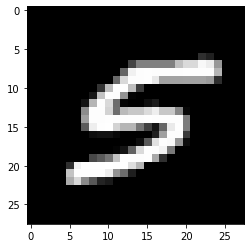

index: 55601
Lable: 1


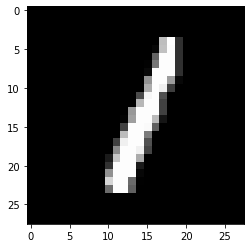

index: 7917
Lable: 5


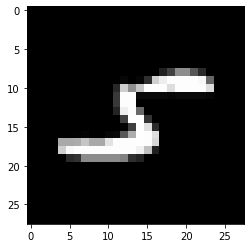

index: 6005
Lable: 2


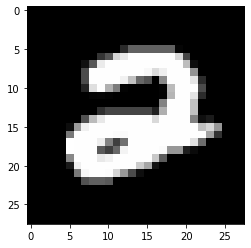

index: 56553
Lable: 2


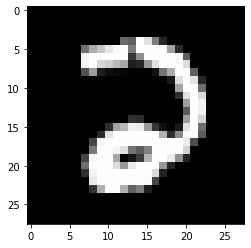

___________________


There are 60000 labels in training dataset for 60000 images in training dataset
There are 10000 labels in training dataset for 10000 images in training dataset
___________________


There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

___________________




In [3]:
# Loading dataset
dataset = keras.datasets.mnist.load_data()

# Description of dataset

# mnint is handwritten digits (0 to 9) images dataset
# keras.datasets.mnist.load_data() loads those images in gray scale as cv2 images / np arrays
# with those labels


# dataset is in tuple form,
# its first index dataset[0] represents training dataset
# its second index dataset[1] represents testing dataset

# Both training (dataset[0]) and testing (dataset[1]) datasets
# are further tuples and have two elements,

# first element of both training and testing (dataset[0][0] and dataset[0][0])
# represnts images in numpy arrays
print("There are",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][0]),"images in training dataset")
print("___________________\n\n")
# Each image is of shape 28x28
# print(dataset[0][0][0].shape)
# print("___________________")


# second element of both training and testing (dataset[0][1] and dataset[0][1])
# represnts labels of the images, presents on the same index in images
# For example dataset[0][0][0] is an image in training dataset
# and dataset[0][1][0] is the label of same image is training dataset
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(dataset[0])
print("___________________\n\n")
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(dataset[0])
print("___________________\n\n")

print("There are",len(dataset[0][1]),"labels in training dataset for",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][1]),"labels in training dataset for",len(dataset[1][0]),"images in training dataset")
print("___________________\n\n")

print("There are", len(set(dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[0][1]))
print("There are", len(set(dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[1][1]))
print("___________________\n\n")





# Task

You have to reduce the size of this dataset by 10 times.

There are currently almost 5000 to 6000 thousand images (total: 60000) for each label in training and almost 1000 images (total: 10000) for each label in testing dataset.

You are required to reduce this training dataset so that it will have exactly 600 images for each label (total: 6000) in training dataset and exactly 100 images for each label in testing dataset (total: 1000)

new dataset should be stored into new_dataset variable name and should have exactly same format as the original dataset.


In [12]:
# Creating new dataset with reduced size

new_train_x = []
new_train_y = []
new_test_x = []
new_test_y = []

for label in range(10):

# Select 1/10th of the images for the current label from training data

    train_data = np.where(dataset[0][1] == label)[0]

    train_data = np.random.choice(train_data, size=600, replace=False)

    new_train_x.append(dataset[0][0][train_data])

    new_train_y.extend([label]*600)

# Selecting 1/10th of the images for the current label from testing dataset

    test_data = np.where(dataset[1][1] == label)[0]

    test_data = np.random.choice(test_data, size=100, replace=False)

    new_test_x.append(dataset[1][0][test_indices])
 
    new_test_y.extend([label]*100)

# Storing the new dataset in the same format as the original dataset

new_dataset = (np.concatenate(new_train_x), np.array(new_train_y)), (np.concatenate(new_test_x), np.array(new_test_y))


# Validation of Task

(28, 28)
___________________
There are 6000 labels in training dataset for 6000 images in training dataset
There are 1000 labels in training dataset for 1000 images in training dataset
___________________


There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 600,
         1: 600,
         2: 600,
         3: 600,
         4: 600,
         5: 600,
         6: 600,
         7: 600,
         8: 600,
         9: 600})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 100,
         1: 100,
         2: 100,
         3: 100,
         4: 100,
         5: 100,
         6: 100,
         7: 100,
         8: 100,
         9: 100})

___________________


Randomly printing 10 images with labels from training dataset
index: 5624
Lable: 9


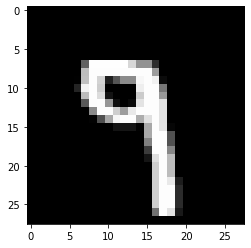

index: 4837
Lable: 8


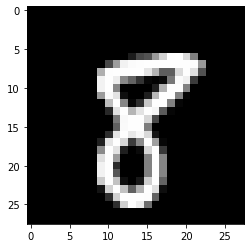

index: 4314
Lable: 7


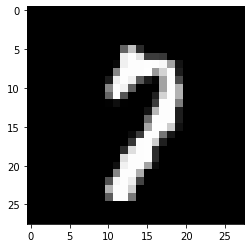

index: 2844
Lable: 4


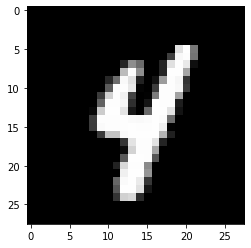

index: 5909
Lable: 9


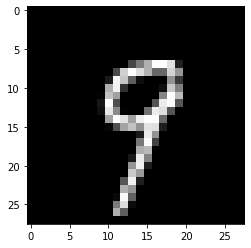

index: 3491
Lable: 5


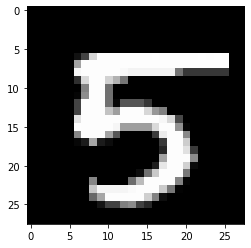

index: 2595
Lable: 4


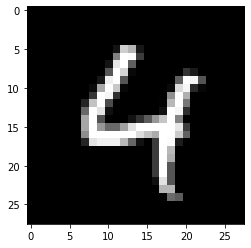

index: 1653
Lable: 2


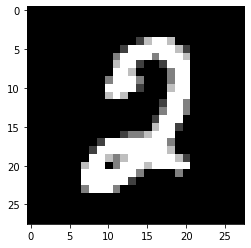

index: 2038
Lable: 3


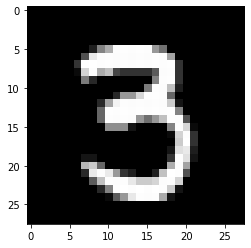

index: 456
Lable: 0


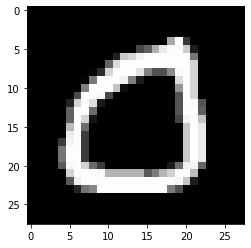

___________________


Randomly printing 10 images with labels from testing dataset
index: 4246
Lable: 7


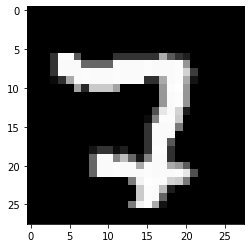

index: 2294
Lable: 3


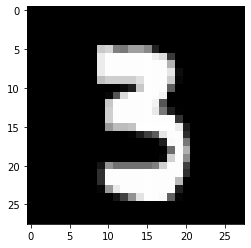

index: 3873
Lable: 6


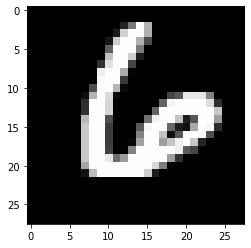

index: 2985
Lable: 4


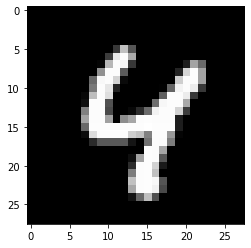

index: 3050
Lable: 5


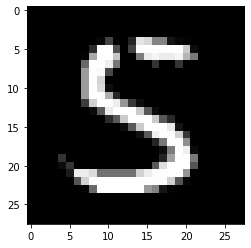

index: 1043
Lable: 1


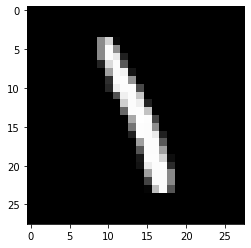

index: 4609
Lable: 7


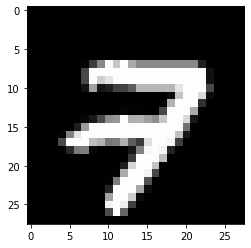

index: 5996
Lable: 9


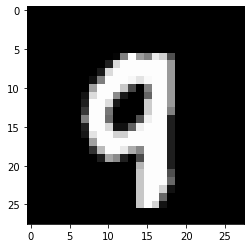

index: 1061
Lable: 1


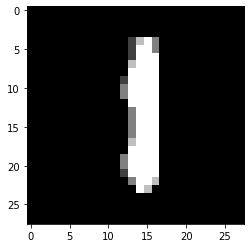

index: 1423
Lable: 2


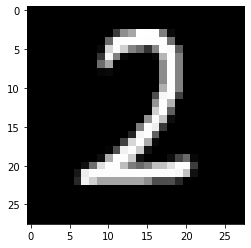

___________________




In [13]:
# Checking the shape of first image in new training dataset
print(new_dataset[0][0][0].shape)
print("___________________")


# Checking the size of dataset
print("There are",len(new_dataset[0][1]),"labels in training dataset for",len(new_dataset[0][0]),"images in training dataset")
print("There are",len(new_dataset[1][1]),"labels in training dataset for",len(new_dataset[1][0]),"images in training dataset")
print("___________________\n\n")
# Excepted output
# There are 6000 labels in training dataset for 6000 images in training dataset
# There are 1000 labels in training dataset for 1000 images in training dataset




# Checking the number of images per class
print("There are", len(set(new_dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[0][1]))
print("There are", len(set(new_dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[1][1]))
print("___________________\n\n")
# Expected output
# There are 10 unique classes in training dataset
# Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
# Counter({0: 600,
#          1: 600,
#          2: 600,
#          3: 600,
#          4: 600,
#          5: 600,
#          6: 600,
#          7: 600,
#          8: 600,
#          9: 600})
# There are 10 unique classes in validation dataset
# Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
# Counter({0: 100,
#          1: 100,
#          2: 100,
#          3: 100,
#          4: 100,
#          5: 100,
#          6: 100,
#          7: 100,
#          8: 100,
#          9: 100})


# Checking the correctness of indexing of image and its labels
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(new_dataset[0])
print("___________________\n\n")
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(new_dataset[0])
print("___________________\n\n")

